<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/TransformadaDeLaplace./S%26S%3ADefinici%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ejercicio1

%matplotlib inline
import sympy as sym
sym.init_printing() #Importar sympy y declarar variables simbólicas
t=sym.symbols('t', real=True)
s=sym.symbols('s', complex=True)

#Integral transformada de Laplace:

X=sym.integrate(sym.DiracDelta(t)*sym.exp(-s*t), (t, -sym.oo, sym.oo))
s0=sym.symbols('s0', complex=True)

#utilizamos la función de transformada de Laplace de sympy:

X, a, cond=sym.laplace_transform(sym.exp(-s0*t), t, s)
sigma, omega=sym.symbols('Sigma Omega') #Declarar las variables simbólicas y la expresión de la transformada
X=1/(s+s0)
X1=X.subs({s:sigma+sym.I*omega, s0:1+sym.I})

#Gráfico en 3D:

sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2),
                    xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$');
poles=sym.roots(sym.denom(X), s) #Se obtienen la raices del denominador
zeros=sym.roots(sym.numer(X), s) #Se obtienen las raíces del numerador

import matplotlib.pyplot as plt

def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
    if ax is None:
        ax=plt.gca()
    ax.set_aspect(1)
    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()
X2=X.subs(s0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

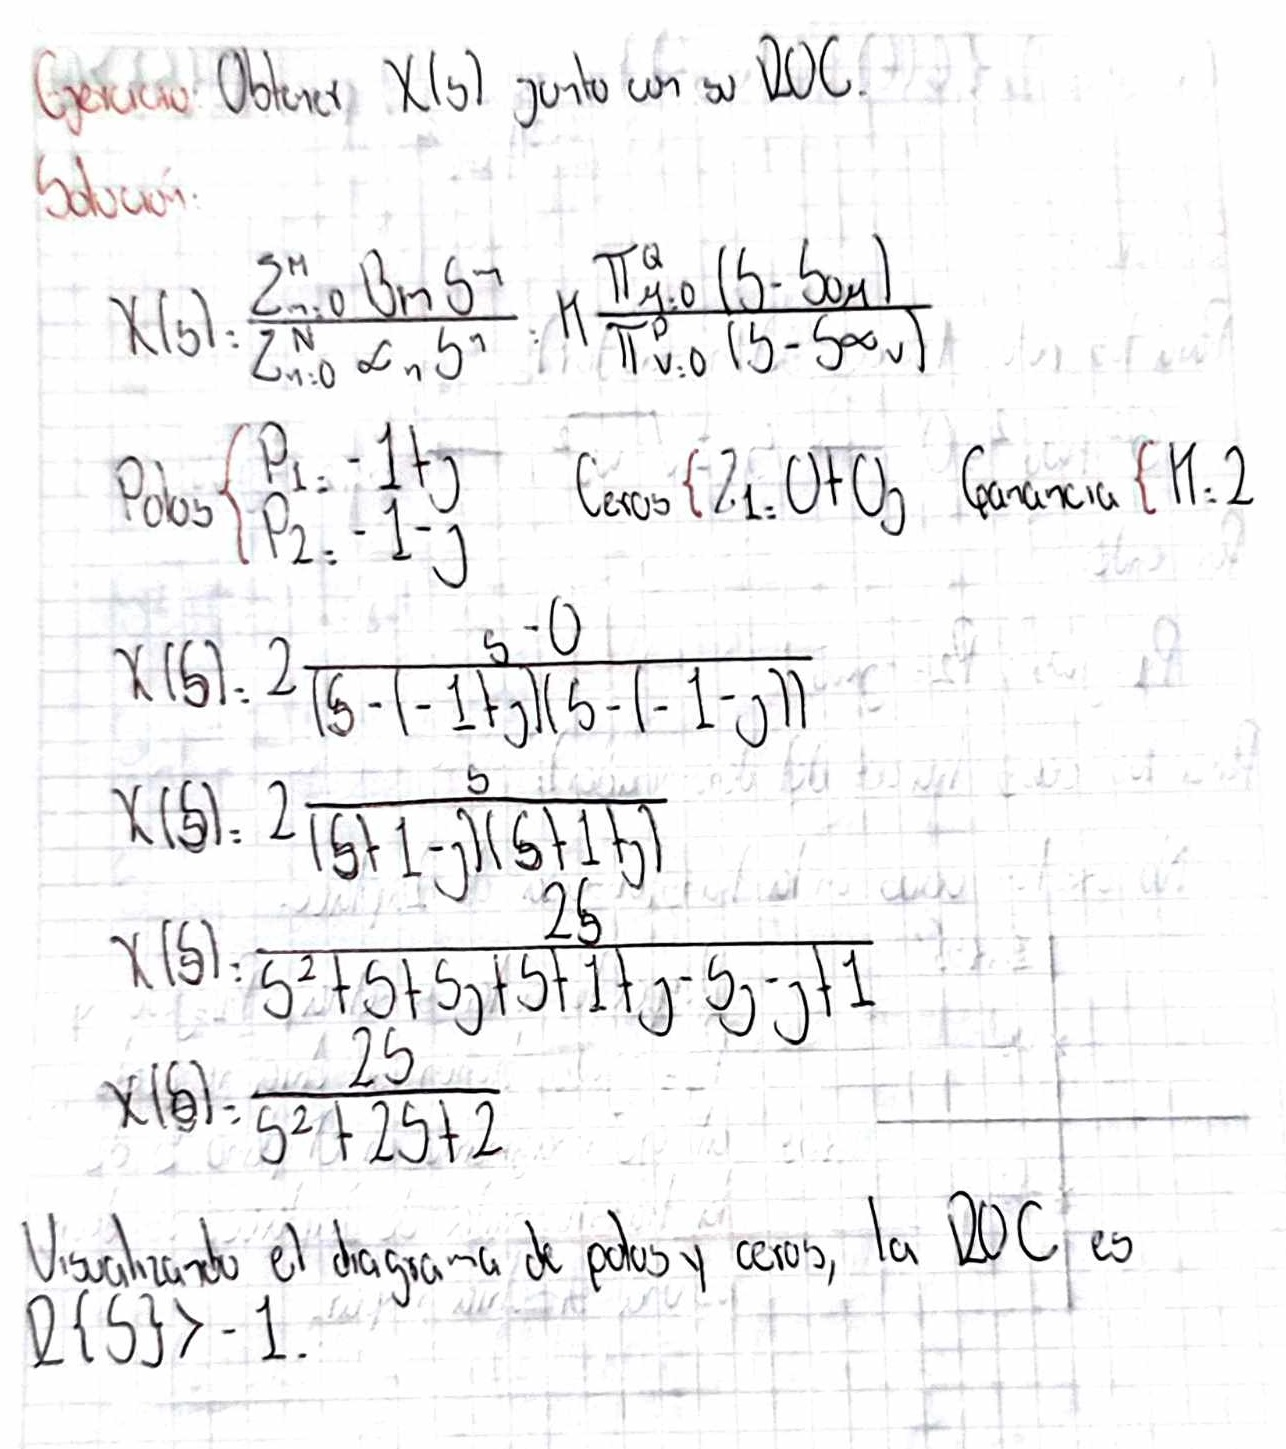